In [438]:
%matplotlib inline
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [439]:
iris = load_iris()
irisX = iris.data
irisY = iris.target
irisY = pd.get_dummies(irisY).values  #use pd.get_dummies() to convert categorical variable into dummy/indicator variables
trainX, testX, trainY, testY = train_test_split(irisX, 
                                                irisY, 
                                                test_size = 0.33,
                                                random_state = 42)

print("Shape of trainX: ", trainX.shape)
print("Shape of testX: ", testX.shape)
print("Shape of trainY: ", trainY.shape)
print("Shape of testY: ", testY.shape)

numFeatures = trainX.shape[1]
numLabels = trainY.shape[1]

print("Number of features in training set: ", numFeatures)
print("Number of labels in training set: ", numLabels)

Shape of trainX:  (100, 4)
Shape of testX:  (50, 4)
Shape of trainY:  (100, 3)
Shape of testY:  (50, 3)
Number of features in training set:  4
Number of labels in training set:  3


In [440]:
#placeholders

X = tf.placeholder(tf.float64, [None, numFeatures])
Y = tf.placeholder(tf.float64, [None, numLabels])

In [441]:
#randomly sampled weights and bias with mean = 0 and stddev = 0.01

mean, stddev = 0, 0.01

W = tf.Variable(np.random.normal(mean, stddev, (numFeatures, numLabels)))
b = tf.Variable(np.random.normal(mean, stddev, (1, numLabels)))

In [442]:
#activation; sigmoid function

predY = tf.sigmoid(tf.add(tf.matmul(X, W), b))

In [443]:
training_cycles = 1000
learning_rate = 0.0001

#loss funtion is l2-loss

loss_op = tf.nn.l2_loss(predY - Y)
optimizer_op = tf.train.GradientDescentOptimizer(learningRate).minimize(loss_op)

In [444]:
#accuracy metrics

accuracy, accuracy_op = tf.metrics.accuracy(tf.argmax(Y, 1), tf.argmax(predY, 1))

In [445]:
#initialize variables

sess = tf.Session()
init_global_op = tf.global_variables_initializer()
init_local_op = tf.local_variables_initializer()
sess.run(init_global_op)
sess.run(init_local_op)

In [446]:
#training
    
loss = 0
diff = 1
epoch_values = []
accuracy_values = []
loss_values = []

for i in range(training_cycles + 1):
    if i > 1 and diff < 0.0001:
        print("change in cost {0}; convergence.".format(diff))
        break
    else:
        newPred = sess.run(optimizer_op, feed_dict = {X: trainX, Y: trainY})
        if i % 50 == 0:
            epoch_values.append(i)
            train_accuracy = sess.run(accuracy_op, feed_dict = {X: trainX, Y: trainY})
            accuracy_values.append(train_accuracy)
            newLoss = sess.run(loss_op, feed_dict = {X: trainX, Y: trainY})
            loss_values.append(newLoss)

            diff = abs(newLoss - loss)
            loss = newLoss
            print("Step: {0}, Loss: {1:.6f}, Change in Loss: {2:.6f}, Accuracy: {3:.6f}".format(i, 
                                                                                    newLoss, 
                                                                                    diff, 
                                                                                    train_accuracy))

Step: 0, Loss: 34.760679, Change in Loss: 34.760679, Accuracy: 0.340000
Step: 50, Loss: 24.234664, Change in Loss: 10.526014, Accuracy: 0.495000
Step: 100, Loss: 20.738235, Change in Loss: 3.496430, Accuracy: 0.546667
Step: 150, Loss: 19.057055, Change in Loss: 1.681179, Accuracy: 0.577500
Step: 200, Loss: 18.055725, Change in Loss: 1.001330, Accuracy: 0.606000
Step: 250, Loss: 17.365940, Change in Loss: 0.689785, Accuracy: 0.633333
Step: 300, Loss: 16.843810, Change in Loss: 0.522130, Accuracy: 0.655714
Step: 350, Loss: 16.423347, Change in Loss: 0.420463, Accuracy: 0.675000
Step: 400, Loss: 16.070361, Change in Loss: 0.352986, Accuracy: 0.692222
Step: 450, Loss: 15.765378, Change in Loss: 0.304983, Accuracy: 0.709000
Step: 500, Loss: 15.496435, Change in Loss: 0.268944, Accuracy: 0.725455
Step: 550, Loss: 15.255707, Change in Loss: 0.240728, Accuracy: 0.739167
Step: 600, Loss: 15.037808, Change in Loss: 0.217899, Accuracy: 0.751538
Step: 650, Loss: 14.838863, Change in Loss: 0.198945

In [447]:
print("Final accuracy on test set: {0:.6f}" .format(sess.run(accuracy_op, 
                                                 feed_dict={X: testX, 
                                                            Y: testY})))

Final accuracy on test set: 0.819070


Text(0,0.5,'loss')

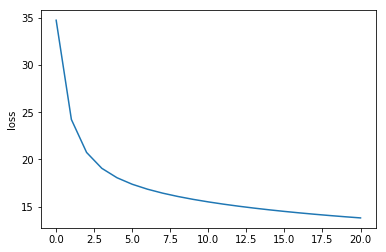

In [448]:
plt.plot(loss_values)
plt.ylabel("loss")

Text(0,0.5,'accuracy')

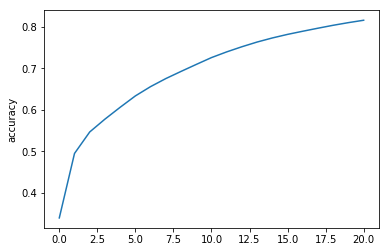

In [449]:
plt.plot(accuracy_values)
plt.ylabel("accuracy")